In [1]:
!git clone https://github.com/Tarandro/BinaryML_churn.git

Cloning into 'BinaryML_churn'...
remote: Enumerating objects: 123, done.
remote: Counting objects: 100% (123/123), done.
remote: Compressing objects: 100% (90/90), done.
remote: Total 123 (delta 46), reused 103 (delta 29), pack-reused 0
Receiving objects: 100% (123/123), 1.31 MiB | 2.79 MiB/s, done.
Resolving deltas: 100% (46/46), done.


In [2]:
import os
fd = os.open( "/kaggle/working/BinaryML_churn", os.O_RDONLY )
os.fchdir(fd)
os.getcwd()

'/kaggle/working/BinaryML_churn'

In [3]:
import pandas as pd
from binaryML import BinaryML

✔ Download and installation successful
You can now load the model via spacy.load('fr_core_news_md')


In [4]:
#####################
# Parameters
#####################

objective = 'text_binary_proba'  # or 'text_binary'            ('binary_proba' : predict proba and 'binary' : predict 0 or 1)
target = 'sentiment'

column_text = 'text'  # (column with texts)

frac = 0.8  # train_test_split fraction                 (data is split in train/test with frac = % for training dataset)

max_run_time_per_modele = 20  # (limit gridsearch time for each model)

scoring = 'f1'  # ['accuracy','f1','recall','precision','roc_auc']
sort_leaderboard = 'f1'  # ['accuracy','f1','recall','precision','roc_auc']

# number of folds during gridsearch and validation :
nfolds = 5

class_weight = True

apply_stacking = False
apply_blend_model = True

# show result:
print_result = True
# list of models to exclude :
exclude_model = []  # FastText work only with pre-training dataset on kaggle (see url method_embedding)
                    # Need GPU for BERT
# NLP : ['tf-idf+Naive_Bayes', 'tf-idf+SGDClassifier', 'tf-idf+Logistic_Regression', 'Fasttext_Attention', 'BERT']

method_embedding = {'Fasttext_Attention': '/kaggle/input/fasttext-french-2b-300d/cc.fr.300.vec',
                    'BERT': 'CamemBERT',
                    'spacy': [('all', False), (['ADJ', 'NOUN', 'VERB', 'DET'], False),
                              (['ADJ', 'NOUN'], True)]}

# Read Data

In [5]:
data = pd.read_csv('./data/TrustPilot_data.csv')
data = data[~data.text.isnull()].reset_index(drop=True)
data['sentiment'] = data.star.map({5: 1, 4: 1, 3: 0, 2: 0, 1: 0})
data.head()

,title,date,star,text,sentiment
0,Excellent,2021-01-02T10:01:14+00:00,5,"Très bien, service parfait et rapide.",1
1,"Bonjour,",2021-01-01T14:54:01+00:00,5,"Bonjour,J'étais bien reçue par Monsieur Antony...",1
2,Bonjour.compte bloqué,2020-12-30T20:29:03+00:00,1,"Bonjour.compte bloqué. .carte ,retrait,viremen...",0
3,ORANGE BANK ou la banque de DINGO,2020-12-30T19:22:00+00:00,1,ORANGE BANK ou votre interlocueteur est le ROB...,0
4,Très pratique,2020-12-30T17:16:37+00:00,5,"Très pratique, je peux à tout moment bloquer l...",1


In [6]:
bml = BinaryML(scoring=scoring, objective=objective, nfolds=nfolds, class_weight=class_weight,
                   print_result=print_result, max_run_time_per_modele=max_run_time_per_modele,
                   apply_stacking=apply_stacking, apply_blend_model=apply_blend_model, exclude_model=exclude_model,
                   method_embedding=method_embedding)

# Preprocessing

In [7]:
bml.data_preprocessing(data, target=target, column_text=column_text, frac=frac)

In [8]:
# data after preprocessing :
bml.data

,text
0,"Très bien, service parfait et rapide."
1,"Bonjour,J'étais bien reçue par Monsieur Antony..."
2,"Bonjour.compte bloqué. .carte ,retrait,viremen..."
3,ORANGE BANK ou votre interlocueteur est le ROB...
4,"Très pratique, je peux à tout moment bloquer l..."
...,...
393,Impossible d'ouvrir un compte. Bugs en plein m...
394,"Attention Orange bank fait du fishing, ils réc..."
395,Après plusieurs refus d'ouverture d'un compte ...
396,Bugs très graves de l’appli. Souvent on ne peu...


# Training


tf-idf+Naive_Bayes Model : 

  Total time : 18.02 and n_iter : 54
Best parameters:  {'clf__alpha': 0.149502947830227, 'vect__tfidf__binary': False, 'vect__tfidf__lowercase': True, 'vect__tfidf__ngram_range': (1, 1), 'vect__tfidf__stop_words': True}
Mean cross-validated score of the best_estimator:  0.8208


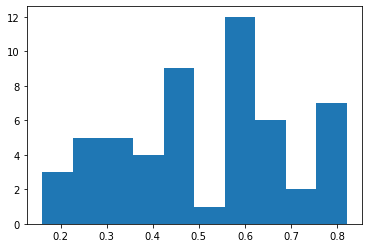

Time search : 18.184028713000032

Cross validation score :

roc_auc = 0.9488
precision 1 = 0.9529
recall 1 = 0.7168
f1 score 1 = 0.8182

              precision    recall  f1-score   support

           0      0.863     0.980     0.918       205
           1      0.953     0.717     0.818       113

    accuracy                          0.887       318
   macro avg      0.908     0.849     0.868       318
weighted avg      0.895     0.887     0.882       318

Time validation : 0.16780185499999334

tf-idf+SGDClassifier Model : 

  Total time : 11.272 and n_iter : 1
Best parameters:  {'clf__alpha': 0.0035267998484725975, 'clf__loss': 'modified_huber', 'clf__penalty': 'l2', 'vect__text__reduce_dim': TruncatedSVD(n_components=100), 'vect__text__tfidf__binary': True, 'vect__text__tfidf__lowercase': True, 'vect__text__tfidf__ngram_range': (1, 3), 'vect__text__tfidf__stop_words': None}
Mean cross-validated score of the best_estimator:  0.6574


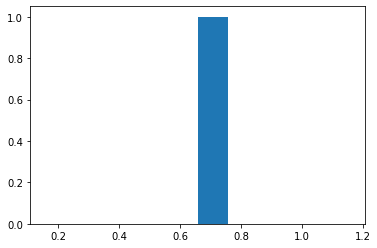

Time search : 11.402946837000002

Cross validation score :

roc_auc = 0.8802
precision 1 = 0.7766
recall 1 = 0.646
f1 score 1 = 0.7053

              precision    recall  f1-score   support

           0      0.821     0.898     0.858       205
           1      0.777     0.646     0.705       113

    accuracy                          0.808       318
   macro avg      0.799     0.772     0.782       318
weighted avg      0.805     0.808     0.804       318

Time validation : 7.9185938560000295

tf-idf+Logistic_Regression Model : 

  Total time : 17.157 and n_iter : 14
Best parameters:  {'clf__C': 35.984719312135624, 'clf__penalty': 'l2', 'vect__text__reduce_dim': TruncatedSVD(n_components=5), 'vect__text__tfidf__binary': False, 'vect__text__tfidf__lowercase': True, 'vect__text__tfidf__ngram_range': (1, 1), 'vect__text__tfidf__stop_words': None}
Mean cross-validated score of the best_estimator:  0.7936


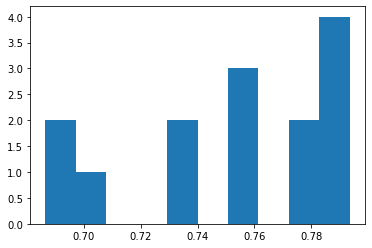

Time search : 17.31581315400001

Cross validation score :

roc_auc = 0.9189
precision 1 = 0.7876
recall 1 = 0.7876
f1 score 1 = 0.7876

              precision    recall  f1-score   support

           0      0.883     0.883     0.883       205
           1      0.788     0.788     0.788       113

    accuracy                          0.849       318
   macro avg      0.835     0.835     0.835       318
weighted avg      0.849     0.849     0.849       318

Time validation : 0.4051527759999658

tf-idf+Naive_Bayes_ADJ_NOUN_VERB_DET Model : 

  Total time : 17.768 and n_iter : 58
Best parameters:  {'clf__alpha': 0.15762523579788523, 'vect__tfidf__binary': True, 'vect__tfidf__lowercase': True, 'vect__tfidf__ngram_range': (1, 1), 'vect__tfidf__stop_words': True}
Mean cross-validated score of the best_estimator:  0.7943


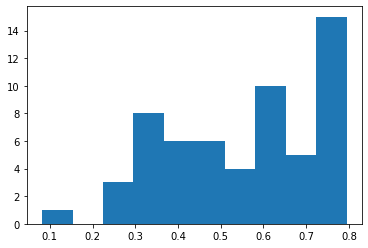

Time search : 17.908630448999986

Cross validation score :

roc_auc = 0.9469
precision 1 = 0.954
recall 1 = 0.7345
f1 score 1 = 0.83

              precision    recall  f1-score   support

           0      0.870     0.980     0.922       205
           1      0.954     0.735     0.830       113

    accuracy                          0.893       318
   macro avg      0.912     0.858     0.876       318
weighted avg      0.900     0.893     0.889       318

Time validation : 0.17269004799999266

tf-idf+SGDClassifier_ADJ_NOUN_VERB_DET Model : 

  Total time : 17.192 and n_iter : 18
Best parameters:  {'clf__alpha': 0.003628815966149499, 'clf__loss': 'modified_huber', 'clf__penalty': 'l2', 'vect__text__reduce_dim': TruncatedSVD(n_components=20), 'vect__text__tfidf__binary': False, 'vect__text__tfidf__lowercase': True, 'vect__text__tfidf__ngram_range': (1, 1), 'vect__text__tfidf__stop_words': True}
Mean cross-validated score of the best_estimator:  0.8244


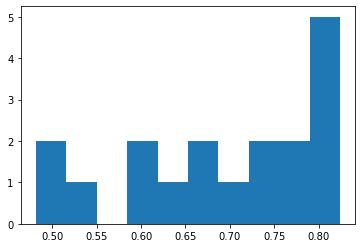

Time search : 17.365391174000024

Cross validation score :

roc_auc = 0.8873
precision 1 = 0.7757
recall 1 = 0.7345
f1 score 1 = 0.7545

              precision    recall  f1-score   support

           0      0.858     0.883     0.870       205
           1      0.776     0.735     0.755       113

    accuracy                          0.830       318
   macro avg      0.817     0.809     0.812       318
weighted avg      0.829     0.830     0.829       318

Time validation : 0.6886384389999876

tf-idf+Logistic_Regression_ADJ_NOUN_VERB_DET Model : 

  Total time : 16.09 and n_iter : 16
Best parameters:  {'clf__C': 1.5128837344480173, 'clf__penalty': 'l2', 'vect__text__reduce_dim': TruncatedSVD(n_components=20), 'vect__text__tfidf__binary': True, 'vect__text__tfidf__lowercase': True, 'vect__text__tfidf__ngram_range': (1, 1), 'vect__text__tfidf__stop_words': None}
Mean cross-validated score of the best_estimator:  0.8359


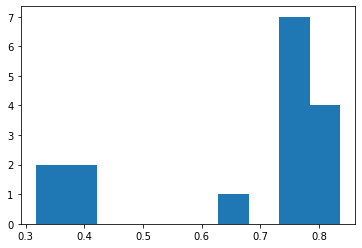

Time search : 16.26542763399999

Cross validation score :

roc_auc = 0.9487
precision 1 = 0.8812
recall 1 = 0.7876
f1 score 1 = 0.8318

              precision    recall  f1-score   support

           0      0.889     0.941     0.915       205
           1      0.881     0.788     0.832       113

    accuracy                          0.887       318
   macro avg      0.885     0.865     0.873       318
weighted avg      0.886     0.887     0.885       318

Time validation : 0.39407790699999623

tf-idf+Naive_Bayes_ADJ_NOUN_lem Model : 

  Total time : 17.126 and n_iter : 46
Best parameters:  {'clf__alpha': 0.0060130563229588985, 'vect__tfidf__binary': False, 'vect__tfidf__lowercase': False, 'vect__tfidf__ngram_range': (1, 2), 'vect__tfidf__stop_words': None}
Mean cross-validated score of the best_estimator:  0.7528


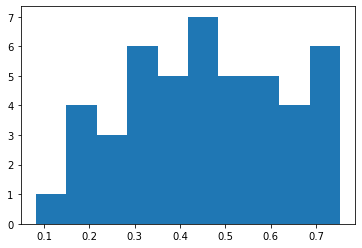

Time search : 17.26107804000003

Cross validation score :

roc_auc = 0.9479
precision 1 = 0.939
recall 1 = 0.6814
f1 score 1 = 0.7897

              precision    recall  f1-score   support

           0      0.847     0.976     0.907       205
           1      0.939     0.681     0.790       113

    accuracy                          0.871       318
   macro avg      0.893     0.829     0.848       318
weighted avg      0.880     0.871     0.865       318

Time validation : 0.36574777700002414

tf-idf+SGDClassifier_ADJ_NOUN_lem Model : 

  Total time : 16.091 and n_iter : 19
Best parameters:  {'clf__alpha': 0.009713289463112902, 'clf__loss': 'log', 'clf__penalty': 'l2', 'vect__text__reduce_dim': None, 'vect__text__tfidf__binary': True, 'vect__text__tfidf__lowercase': False, 'vect__text__tfidf__ngram_range': (1, 1), 'vect__text__tfidf__stop_words': True}
Mean cross-validated score of the best_estimator:  0.8155


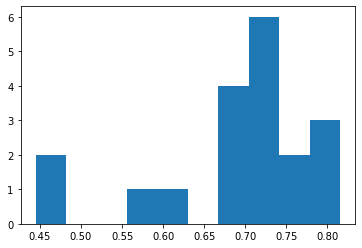

Time search : 16.231814326999995

Cross validation score :

roc_auc = 0.9463
precision 1 = 0.9022
recall 1 = 0.7345
f1 score 1 = 0.8098

              precision    recall  f1-score   support

           0      0.867     0.956     0.910       205
           1      0.902     0.735     0.810       113

    accuracy                          0.877       318
   macro avg      0.885     0.845     0.860       318
weighted avg      0.880     0.877     0.874       318

Time validation : 0.1966458270000544

tf-idf+Logistic_Regression_ADJ_NOUN_lem Model : 

  Total time : 16.932 and n_iter : 16
Best parameters:  {'clf__C': 9.914949358990247, 'clf__penalty': 'l2', 'vect__text__reduce_dim': TruncatedSVD(n_components=50), 'vect__text__tfidf__binary': False, 'vect__text__tfidf__lowercase': True, 'vect__text__tfidf__ngram_range': (1, 1), 'vect__text__tfidf__stop_words': True}
Mean cross-validated score of the best_estimator:  0.8503


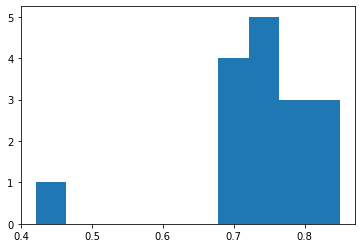

Time search : 17.092258354999956

Cross validation score :

roc_auc = 0.9453
precision 1 = 0.8879
recall 1 = 0.8407
f1 score 1 = 0.8636

              precision    recall  f1-score   support

           0      0.915     0.941     0.928       205
           1      0.888     0.841     0.864       113

    accuracy                          0.906       318
   macro avg      0.901     0.891     0.896       318
weighted avg      0.905     0.906     0.905       318

Time validation : 0.4969256129999735

Fasttext_Attention Model : 

{'hidden_unit': 125, 'learning_rate': 0.01, 'dropout_rate': 0.4000570573097778}
oof_val score
f1
Metric
0.8288288288288288
  1%|          | 1/100 [00:56<1:33:47, 56.84s/trial, best loss: -0.8288288288288288]
Best parameters:  {'dropout_rate': 0.4000570573097778, 'hidden_unit': 125, 'learning_rate': 0.01}
Mean cross-validated score of the best_estimator:  0.8288

Epoch 00006: ReduceLROnPlateau reducing learning rate to 0.0009999999776482583.


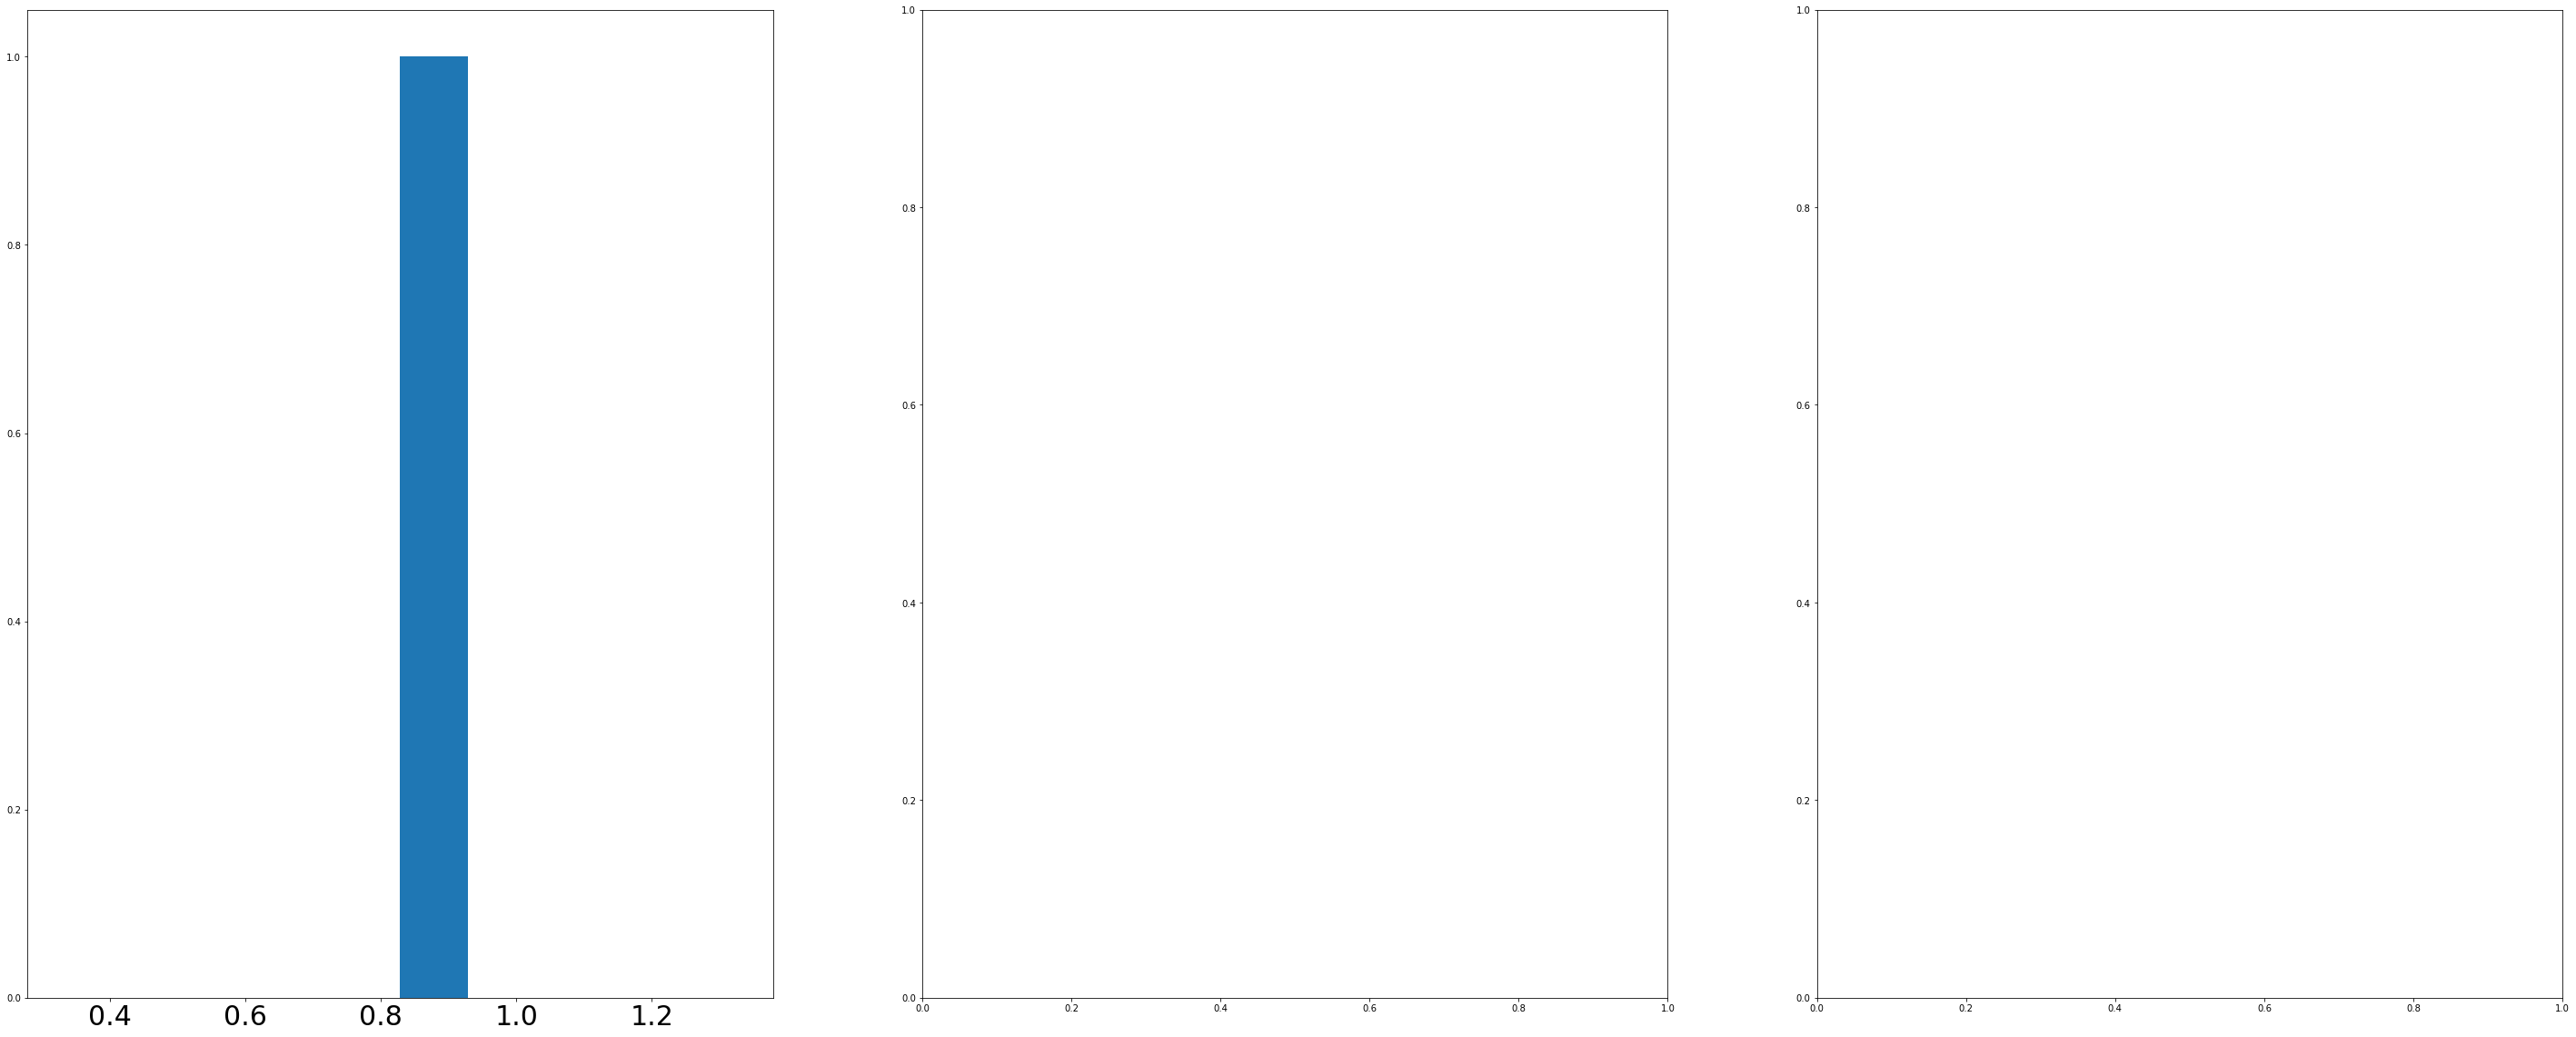

Time search : 66.98853271799999
Epoch 1/50
16/16 [==============================] - 4s 87ms/step - loss: 0.6261 - accuracy: 0.6938 - val_loss: 0.7475 - val_accuracy: 0.6094
Epoch 2/50
16/16 [==============================] - 1s 41ms/step - loss: 0.4203 - accuracy: 0.7305 - val_loss: 0.4767 - val_accuracy: 0.8125
Epoch 3/50
16/16 [==============================] - 1s 43ms/step - loss: 0.1698 - accuracy: 0.9468 - val_loss: 0.4062 - val_accuracy: 0.8125
Epoch 4/50
16/16 [==============================] - 1s 41ms/step - loss: 0.0371 - accuracy: 0.9974 - val_loss: 0.4752 - val_accuracy: 0.7969
Epoch 5/50
16/16 [==============================] - 1s 41ms/step - loss: 0.0176 - accuracy: 0.9941 - val_loss: 0.4852 - val_accuracy: 0.9062
Epoch 6/50
16/16 [==============================] - 1s 41ms/step - loss: 0.0025 - accuracy: 1.0000 - val_loss: 1.0263 - val_accuracy: 0.8281

Epoch 00006: ReduceLROnPlateau reducing learning rate to 0.0009999999776482583.
Epoch 7/50
16/16 [=======================

Downloading:   0%|          | 0.00/811k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/508 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/545M [00:00<?, ?B/s]

Some layers from the model checkpoint at jplu/tf-camembert-base were not used when initializing TFCamembertModel: ['lm_head']
- This IS expected if you are initializing TFCamembertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFCamembertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFCamembertModel were initialized from the model checkpoint at jplu/tf-camembert-base.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFCamembertModel for predictions without further training.


{'learning_rate': 0.0001, 'dropout_rate': 0.25325650867210076}
oof_val score
f1
Metric
0.9910714285714286
  1%|          | 1/100 [08:15<13:37:08, 495.24s/trial, best loss: -0.9910714285714286]
Best parameters:  {'dropout_rate': 0.25325650867210076, 'learning_rate': 0.0001}
Mean cross-validated score of the best_estimator:  0.9911


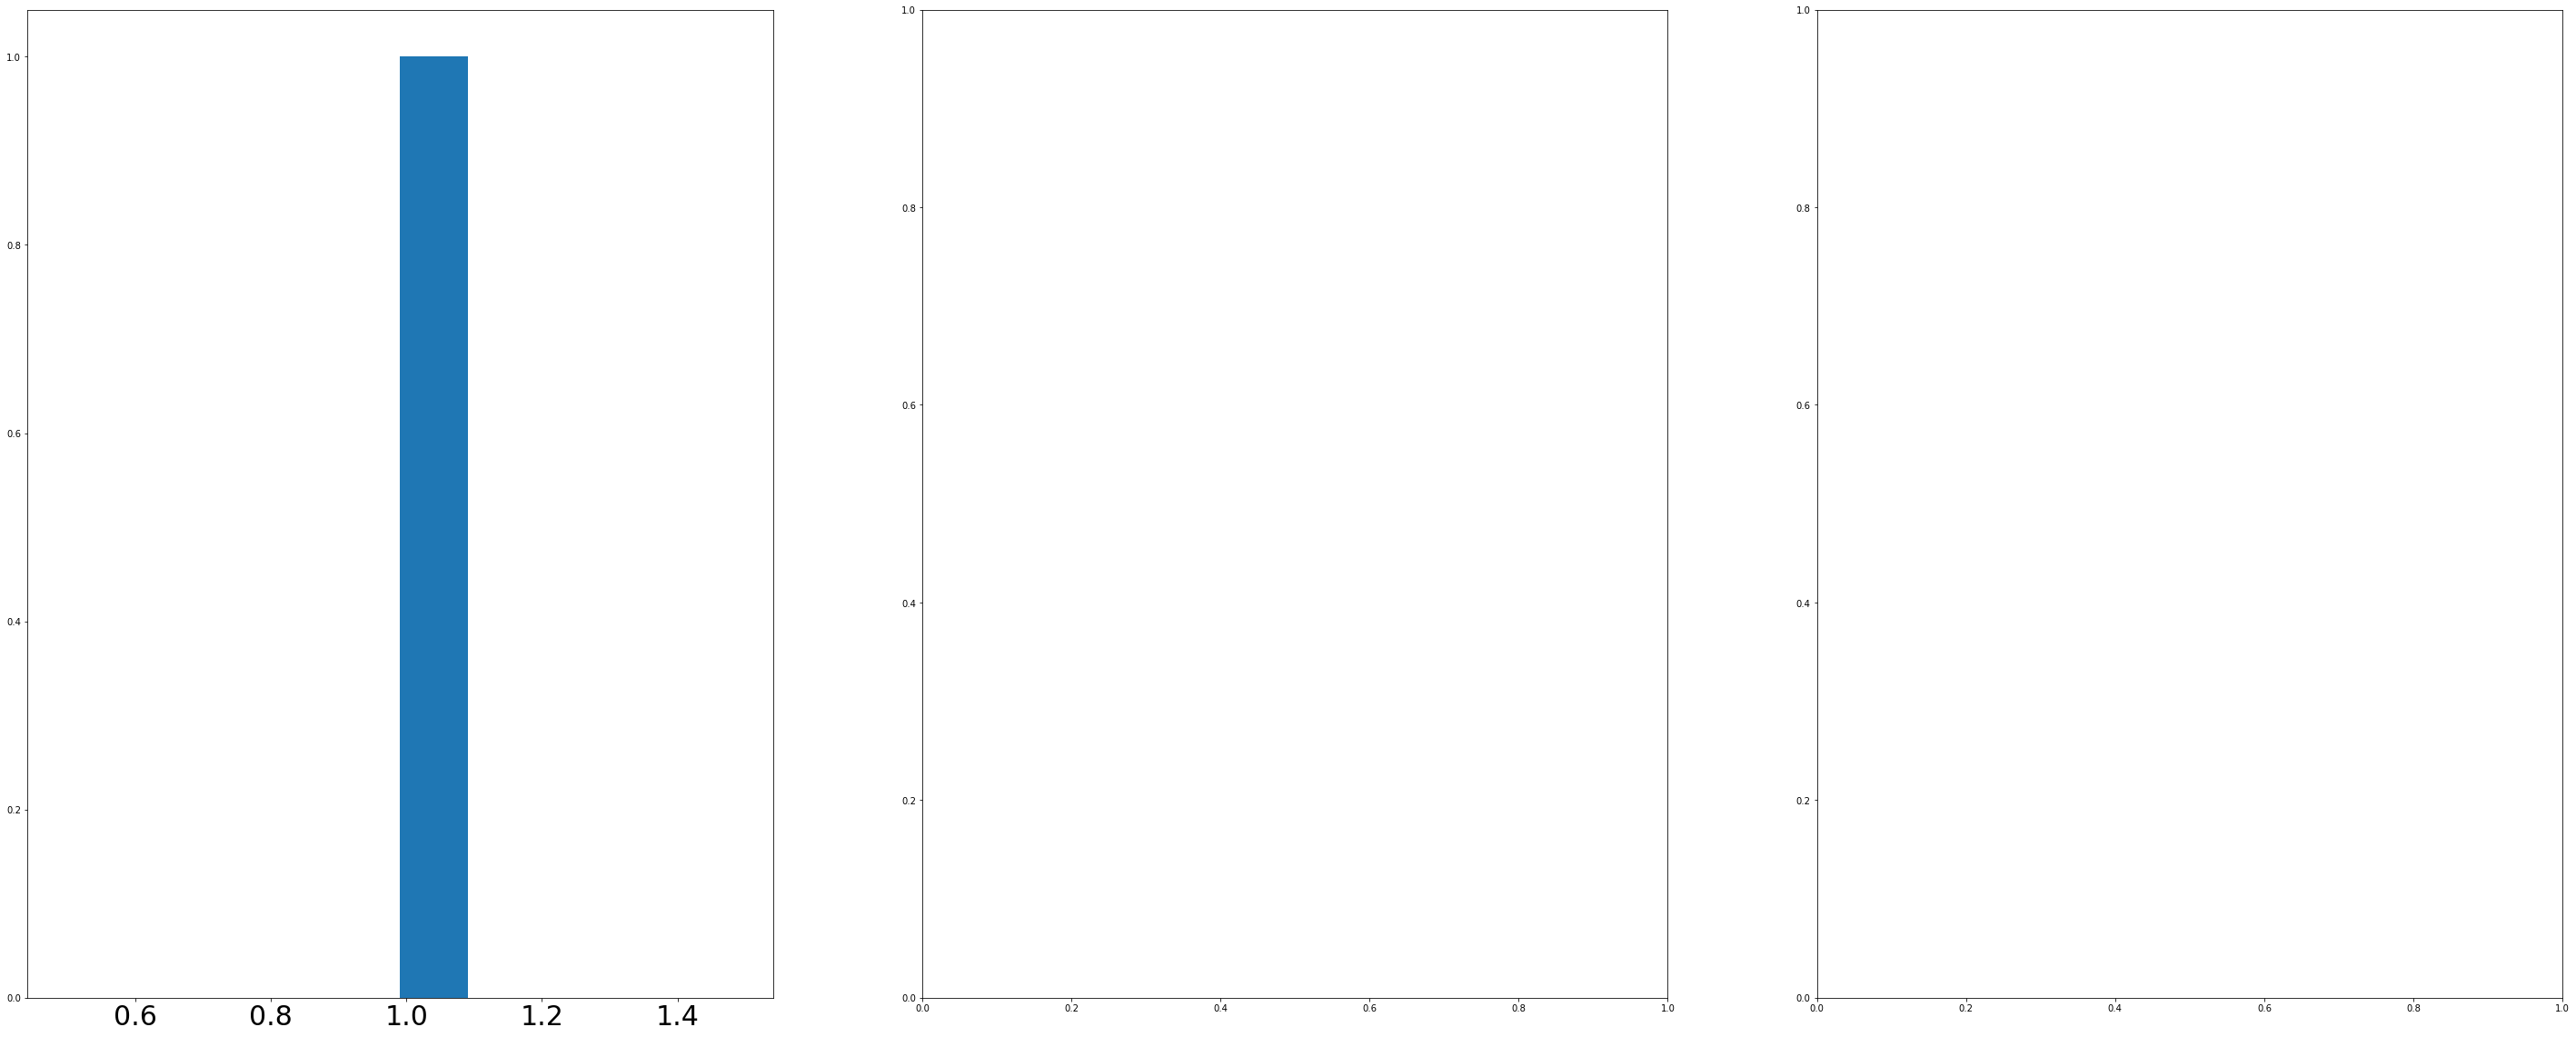

Time search : 589.3130973419999
Epoch 1/50
16/16 [==============================] - 26s 660ms/step - loss: 0.3486 - accuracy: 0.8624 - val_loss: 0.0152 - val_accuracy: 1.0000
Epoch 2/50
16/16 [==============================] - 9s 547ms/step - loss: 0.0984 - accuracy: 0.9781 - val_loss: 0.0108 - val_accuracy: 1.0000
Epoch 3/50
16/16 [==============================] - 9s 542ms/step - loss: 0.0634 - accuracy: 0.9850 - val_loss: 0.1554 - val_accuracy: 0.9688
Epoch 4/50
16/16 [==============================] - 9s 544ms/step - loss: 0.4186 - accuracy: 0.8676 - val_loss: 0.0815 - val_accuracy: 1.0000
Epoch 5/50
16/16 [==============================] - 9s 550ms/step - loss: 0.1245 - accuracy: 0.9816 - val_loss: 0.0241 - val_accuracy: 1.0000
Epoch 6/50
16/16 [==============================] - 9s 544ms/step - loss: 0.1056 - accuracy: 0.9806 - val_loss: 0.0494 - val_accuracy: 1.0000
Kfold # 0  : train loss = 0.06413476914167404  and val loss = 0.01081499271094799
Epoch 1/50
16/16 [===============

In [9]:
bml.train()

# Ensemble

In [10]:
bml.ensemble()


Blend Model : 


Cross validation score :

roc_auc = 0.9801
precision 1 = 0.9694
recall 1 = 0.8407
f1 score 1 = 0.9005

              precision    recall  f1-score   support

           0      0.918     0.985     0.951       205
           1      0.969     0.841     0.900       113

    accuracy                          0.934       318
   macro avg      0.944     0.913     0.926       318
weighted avg      0.936     0.934     0.933       318



# Leaderboard (Validation score)

In [11]:
leaderboard_val = bml.get_leaderboard(sort_by = sort_leaderboard, dataset = 'val')
leaderboard_val

,name,accuracy_val,recall_val,precision_val,f1_val,roc_auc_val
10,BERT,0.9937,0.9912,0.9912,0.9912,0.9955
11,BlendModel,0.9340,0.8407,0.9694,0.9005,0.9801
8,tf-idf+Logistic_Regression_ADJ_NOUN_lem,0.9057,0.8407,0.8879,0.8636,0.9453
5,tf-idf+Logistic_Regression_ADJ_NOUN_VERB_DET,0.8868,0.7876,0.8812,0.8318,0.9487
3,tf-idf+Naive_Bayes_ADJ_NOUN_VERB_DET,0.8931,0.7345,0.9540,0.8300,0.9469
0,tf-idf+Naive_Bayes,0.8868,0.7168,0.9529,0.8182,0.9488
7,tf-idf+SGDClassifier_ADJ_NOUN_lem,0.8774,0.7345,0.9022,0.8098,0.9463
6,tf-idf+Naive_Bayes_ADJ_NOUN_lem,0.8711,0.6814,0.9390,0.7897,0.9479
2,tf-idf+Logistic_Regression,0.8491,0.7876,0.7876,0.7876,0.9189
9,Fasttext_Attention,0.8365,0.7876,0.7607,0.7739,0.9122


In [12]:
df_oof_val = bml.Y_train
for name in bml.models.keys():
    df_oof_val[name] = bml.models[name].info_scores['oof_val']
df_oof_val

,sentiment,tf-idf+Naive_Bayes,tf-idf+SGDClassifier,tf-idf+Logistic_Regression,tf-idf+Naive_Bayes_ADJ_NOUN_VERB_DET,tf-idf+SGDClassifier_ADJ_NOUN_VERB_DET,tf-idf+Logistic_Regression_ADJ_NOUN_VERB_DET,tf-idf+Naive_Bayes_ADJ_NOUN_lem,tf-idf+SGDClassifier_ADJ_NOUN_lem,tf-idf+Logistic_Regression_ADJ_NOUN_lem,Fasttext_Attention,BERT,BlendModel
353,0,0.067750,0.373065,0.071234,0.096475,0.191310,0.235776,0.000030,0.420972,0.095000,0.104392,0.027909,0.153083
21,1,0.582686,0.592265,0.765097,0.577141,0.494072,0.609944,0.753547,0.504335,0.498160,0.883133,0.976821,0.657927
216,1,0.492673,0.388895,0.995238,0.452505,0.370259,0.723353,0.473957,0.547028,0.849009,0.953285,0.988923,0.657739
67,1,0.565271,0.933699,0.775740,0.546140,0.783538,0.598543,0.944480,0.499356,0.612565,0.994330,0.982681,0.748759
131,0,0.062133,0.073220,0.045961,0.083131,0.321645,0.208970,0.004057,0.434549,0.100610,0.511227,0.026179,0.170153
...,...,...,...,...,...,...,...,...,...,...,...,...,...
169,1,0.885973,0.786011,0.988028,0.881810,0.546396,0.821299,0.996026,0.580839,0.831649,0.957100,0.988925,0.842187
180,0,0.140646,0.120309,0.616164,0.131775,0.023263,0.503298,0.049132,0.467673,0.348964,0.900979,0.010534,0.301158
327,0,0.025114,0.000000,0.129711,0.025864,0.324732,0.240146,0.000006,0.446341,0.167294,0.096938,0.026001,0.134741
231,1,0.476104,0.907508,0.616914,0.454454,0.846705,0.542120,0.667393,0.496719,0.700037,0.181723,0.982676,0.624759


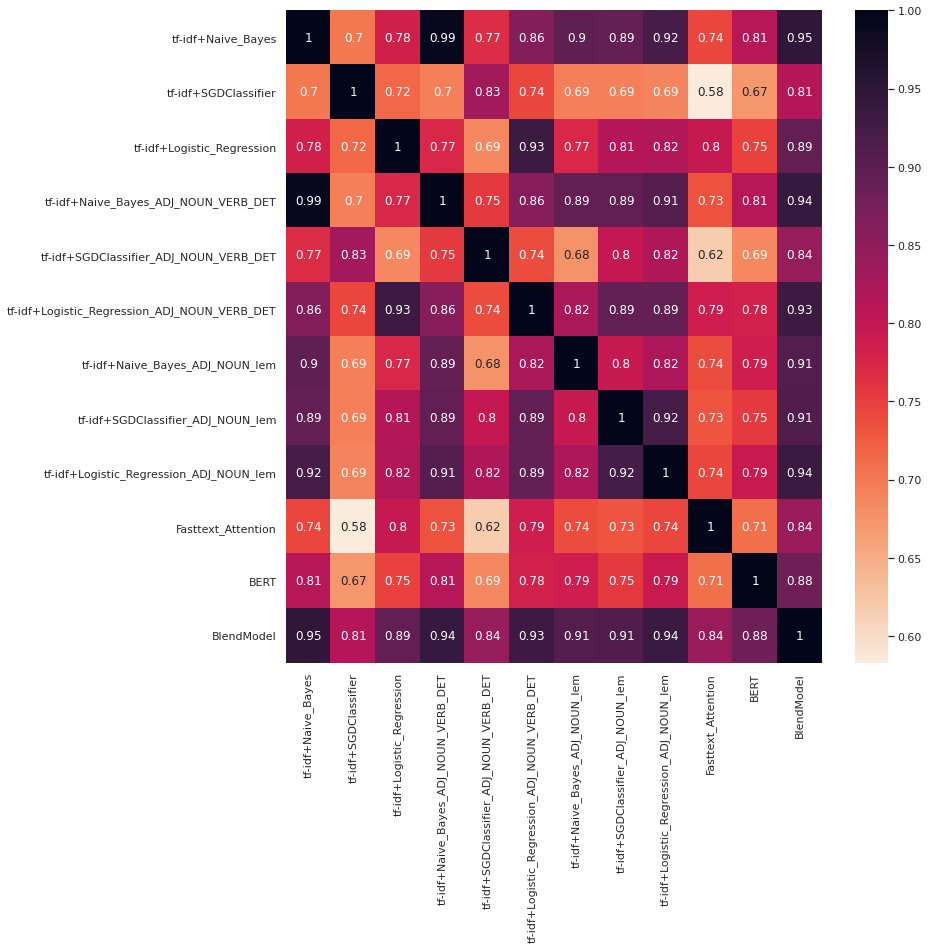

In [13]:
# correlation between oof_val predictions
bml.correlation_models()

In [14]:
df_all_results = bml.get_df_all_results()
df_all_results

,mean_fit_time,params,mean_test_score,std_test_score,model
0,0.024740,"{'clf__alpha': 0.149502947830227, 'vect__tfidf...",0.820822,0.063651,tf-idf+Naive_Bayes
1,0.045252,"{'clf__alpha': 0.031864299564205556, 'vect__tf...",0.783674,0.044886,tf-idf+Naive_Bayes
2,0.025072,"{'clf__alpha': 0.11525319370774745, 'vect__tfi...",0.779695,0.062893,tf-idf+Naive_Bayes
3,0.045440,"{'clf__alpha': 0.034506940335627956, 'vect__tf...",0.777910,0.045781,tf-idf+Naive_Bayes
4,0.042869,"{'clf__alpha': 0.09352691938816005, 'vect__tfi...",0.772362,0.054072,tf-idf+Naive_Bayes
...,...,...,...,...,...
239,0.083377,"{'clf__C': 0.024431690248752438, 'clf__penalty...",0.690109,0.145381,tf-idf+Logistic_Regression_ADJ_NOUN_lem
240,0.167615,"{'clf__C': 4.412935142002021, 'clf__penalty': ...",0.690076,0.055828,tf-idf+Logistic_Regression_ADJ_NOUN_lem
241,0.222381,"{'clf__C': 0.019626040276591598, 'clf__penalty...",0.420771,0.210429,tf-idf+Logistic_Regression_ADJ_NOUN_lem
242,56.828363,"{'dropout_rate': 0.4000570573097778, 'hidden_u...",0.828829,0.000000,Fasttext_Attention


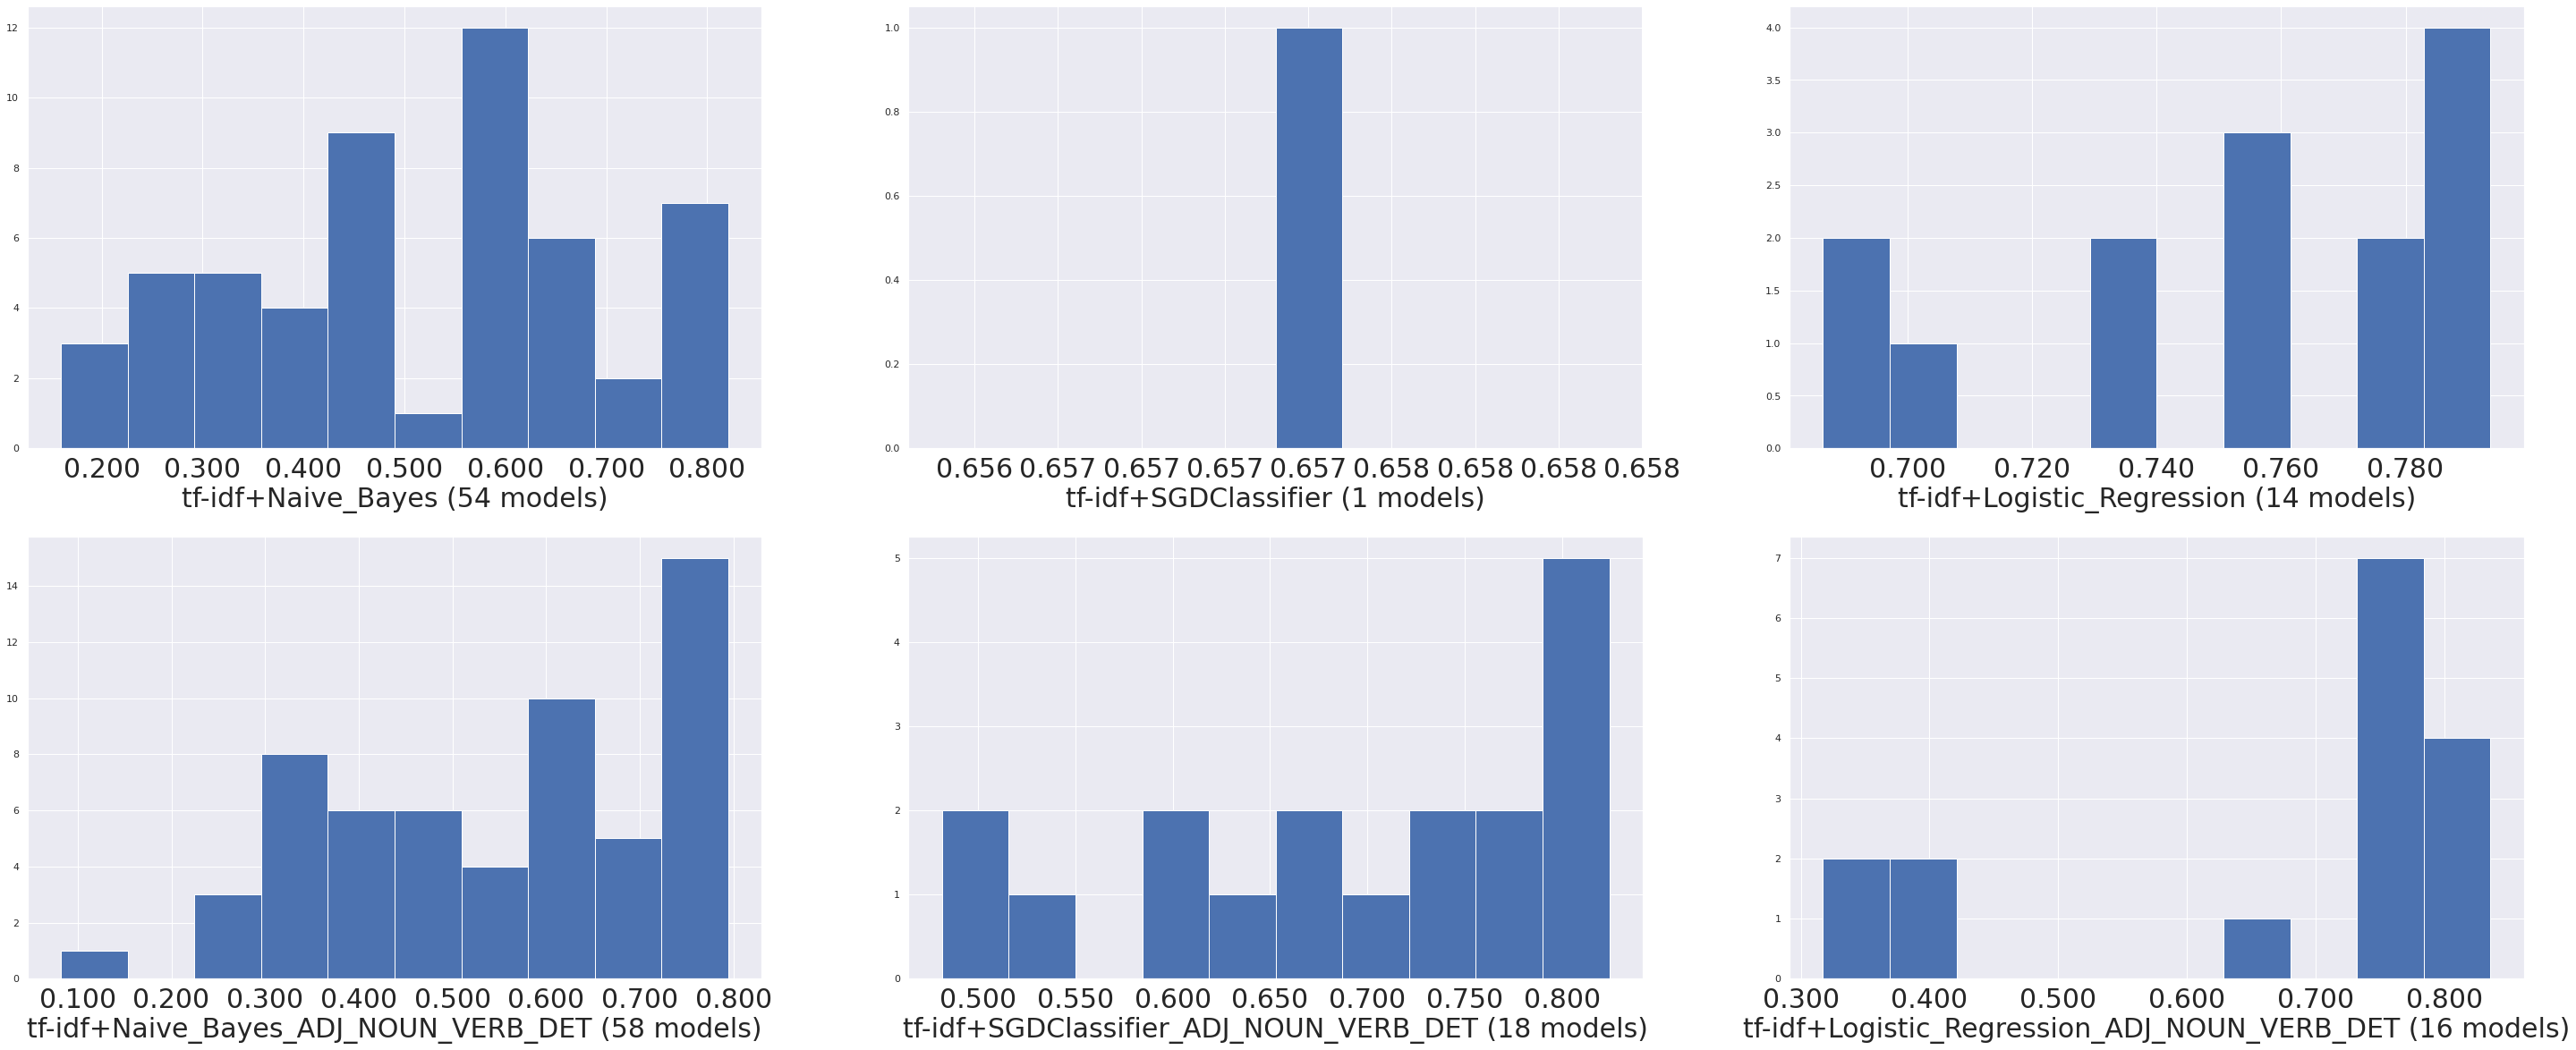

In [15]:
bml.show_distribution_scores()

In [16]:
if bml.objective == 'binary_proba':
        bml.get_roc_curves()

# Testing

In [17]:
on_test_data = True
bml.leader_predict(on_test_data)  # or bml.leader_predict(aml.X_test, aml.Y_test)

In [18]:
leaderboard_test = bml.get_leaderboard(sort_by=sort_leaderboard, dataset='test')
leaderboard_test

,name,accuracy_test,recall_test,precision_test,f1_test,roc_auc_test
11,BlendModel,0.9125,0.7917,0.9048,0.8444,0.9315
2,tf-idf+Logistic_Regression,0.8750,0.7917,0.7917,0.7917,0.8512
5,tf-idf+Logistic_Regression_ADJ_NOUN_VERB_DET,0.8750,0.7500,0.8182,0.7826,0.8393
8,tf-idf+Logistic_Regression_ADJ_NOUN_lem,0.8500,0.7917,0.7308,0.7600,0.8333
3,tf-idf+Naive_Bayes_ADJ_NOUN_VERB_DET,0.8625,0.7083,0.8095,0.7556,0.8185
1,tf-idf+SGDClassifier,0.8750,0.6250,0.9375,0.7500,0.8036
0,tf-idf+Naive_Bayes,0.8625,0.6667,0.8421,0.7442,0.8065
7,tf-idf+SGDClassifier_ADJ_NOUN_lem,0.8500,0.7083,0.7727,0.7391,0.8095
6,tf-idf+Naive_Bayes_ADJ_NOUN_lem,0.8625,0.6250,0.8824,0.7317,0.7946
9,Fasttext_Attention,0.7750,0.8750,0.5833,0.7000,0.8854


In [19]:
df_prediction = bml.dataframe_predictions
df_prediction

,y_true,tf-idf+Naive_Bayes,tf-idf+SGDClassifier,tf-idf+Logistic_Regression,tf-idf+Naive_Bayes_ADJ_NOUN_VERB_DET,tf-idf+SGDClassifier_ADJ_NOUN_VERB_DET,tf-idf+Logistic_Regression_ADJ_NOUN_VERB_DET,tf-idf+Naive_Bayes_ADJ_NOUN_lem,tf-idf+SGDClassifier_ADJ_NOUN_lem,tf-idf+Logistic_Regression_ADJ_NOUN_lem,Fasttext_Attention,BERT,BlendModel
0,1,0,0,1,0,1,0,0,0,1,0.284,0.489,0.343
1,0,0,0,0,0,0,0,0,0,0,0.845,0.463,0.119
2,0,0,0,0,0,0,0,0,0,0,0.008,0.460,0.043
3,1,1,1,1,1,1,1,1,1,1,0.991,0.490,0.953
4,0,0,0,0,0,0,0,0,0,0,0.990,0.463,0.132
...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,0,0,0,0,0,0,0,0,0,0,0.000,0.461,0.042
76,0,0,0,0,0,0,0,0,0,0,0.000,0.460,0.042
77,0,0,0,0,0,0,0,0,0,0,0.007,0.461,0.043
78,0,0,0,0,0,1,0,0,0,1,0.145,0.461,0.237
